# ✏️ Esercizi

In questo esercizio esamineremo i dati contenuti nel file `MehrSongSpelke_exp_1.csv` che sono stati messi a disposizione da Mehr, S. A., Song, L. A., & Spelke, E. S. nel loro articolo *For 5-month-old infants*. Questi dati sono descritti nell'esempio del laboratorio didattico presentato in queste pagine web. Nel presente esercizio ci concentreremo sui problemi della manipolazione e visualizzazione dei dati.

Iniziamo ad importare le librerie necessarie.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats

%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Importiamo i dati da un file csv.

In [2]:
tot_df = pd.read_csv("../chapter_0/laboratorio_didattico/MehrSongSpelke_exp_1.csv")

Esaminiamo a che classe (type) appartiene l'oggetto `tot_df`.

In [3]:
type(tot_df)

pandas.core.frame.DataFrame

L'output della funzione `type` ci dice che `tot_df` è un oggetto Pandas DataFrame.

Vogliamo poi sapere quante colonne e righe ci sono in `tot_df`. I nomi delle colonne sono restituiti dall'attributo `.columns` del DataFrame. Dato che il numero di colonne è molto grande, possiamo stamparle sullo schermo usando la sintassi seguente.

In [4]:
print(*tot_df.columns)

id study_code exp1 exp2 exp3 exp4 exp5 dob dot1 dot2 dot3 female dad train Baseline_Proportion_Gaze_to_Singer Familiarization_Gaze_to_Familiar Familiarization_Gaze_to_Unfamiliar Test_Proportion_Gaze_to_Singer Difference_in_Proportion_Looking Estimated_Total_Number_of_Song totskypesing stim othersing comply_no module skype_before ammat ammar ammatot ammapr ipad_num famtot_6 unfamtot_6 totprac totw totnw age length delay mtotsing mbabylike msingcomf mtotrecord m_othersong pright diarymissing comply_fup survey_completion smsingrate smtalkrate gzsingrate gztalkrate famtot unfamtot totsing1 babylike1 singcomf1 totrecord1 othersong1 dtword1 dtnoword1 totsing2 babylike2 singcomf2 totrecord2 othersong2 dtword2 dtnoword2 totsing3 babylike3 singcomf3 totrecord3 othersong3 dtword3 dtnoword3 totsing4 babylike4 singcomf4 totrecord4 othersong4 dtword4 dtnoword4 totsing5 babylike5 singcomf5 totrecord5 othersong5 dtword5 dtnoword5 totsing6 babylike6 singcomf6 totrecord6 othersong6 dtword6 dtnoword6 to

L'attributo `.shape` ci restituisce l'informazione per cui l'oggetto `tot_df` è costituito da 96 righe e 153 colonne.

In [5]:
tot_df.shape

(96, 153)

È difficile lavorare con tutte queste colonne, per cui creeremo un DataFrame che contiene solo un sottoinsieme di colonne del DataFrame originale.

Per estrarre una singola colonna dal DataFrame usiamo la seguente sintassi. Ad esempio, estraiamo la colonna `exp1`.

In [6]:
tot_df["exp1"]

0     1
1     1
2     1
3     1
4     1
     ..
91    0
92    0
93    0
94    0
95    0
Name: exp1, Length: 96, dtype: int64

Si noti che una sintassi equivalente è la seguente.

In [7]:
tot_df.exp1

0     1
1     1
2     1
3     1
4     1
     ..
91    0
92    0
93    0
94    0
95    0
Name: exp1, Length: 96, dtype: int64

Con la funzione `unique` ottenamo la lista delle modalità di `exp1`.

In [8]:
tot_df["exp1"].unique()

array([1, 0])

Quindi,  `exp1` codifica l'appartenenza di ciascuna osservazione (valore 1) al primo esperimento; il valore 0 indica che la riga per la quale `exp1` vale 0 non appartiene al primo esperimento.

Selezioniamo solo le colonne indicate. Si noti la sintassi con la doppia parentesi quadra. Le parentesi quadre interne specificano una lista.

In [9]:
temp = tot_df[["exp1", "female", "stim", "age", "Test_Proportion_Gaze_to_Singer"]]
temp.head()

,exp1,female,stim,age,Test_Proportion_Gaze_to_Singer
0,1,0,"""C1""",5.848049,0.602740
1,1,0,"""C1""",5.979466,0.683027
2,1,0,"""C2""",5.749486,0.724138
3,1,1,"""C3""",5.913758,0.281654
4,1,1,"""C4""",5.946612,0.498542


Selezioniamo solo le osservazioni dell'esperimento 1.

In [10]:
df = temp[temp["exp1"] == 1]
temp.head()

,exp1,female,stim,age,Test_Proportion_Gaze_to_Singer
0,1,0,"""C1""",5.848049,0.602740
1,1,0,"""C1""",5.979466,0.683027
2,1,0,"""C2""",5.749486,0.724138
3,1,1,"""C3""",5.913758,0.281654
4,1,1,"""C4""",5.946612,0.498542


Possiamo eliminare la colonna `exp1` che ora è inutile.

In [11]:
df = df.drop(columns=["exp1"])
df.head()

,female,stim,age,Test_Proportion_Gaze_to_Singer
0,0,"""C1""",5.848049,0.602740
1,0,"""C1""",5.979466,0.683027
2,0,"""C2""",5.749486,0.724138
3,1,"""C3""",5.913758,0.281654
4,1,"""C4""",5.946612,0.498542


In [12]:
df.tail()

,female,stim,age,Test_Proportion_Gaze_to_Singer
27,1,"""C4""",5.355236,0.531100
28,0,"""C8""",5.223819,0.541899
29,1,"""C5""",6.045175,0.700389
30,1,"""C4""",5.848049,0.762963
31,1,"""C6""",5.420945,0.460274


Il DataFrame `df` è costituito da 32 righe e 4 colonne.

In [13]:
df.shape

(32, 4)

L'attributo `dtypes` ci restituisce il tipo di ciascuna colonna.

In [14]:
df.dtypes

female                              int64
stim                               object
age                               float64
Test_Proportion_Gaze_to_Singer    float64
dtype: object

- La variabile `female` è di tipo numerico e assume valori interi.
- La variabile `stim` è una variabile categorica e le sue modalità sono rappresentate da stringhe.
- Le variabili `age` e `Test_Proportion_Gaze_to_Singer` sono di tipo numerico e possono assumere valori decimali.

## Selezionare le righe

Le righe di un DataFrame possono essere selezionate usando il nome della riga o l'indice di riga. 

È possibile utilizzare l'attributo `.loc[]` sul DataFrame per selezionare le righe in base all'etichetta dell'indice.

Selezioniamo la prima riga.

In [15]:
df.loc[0]

female                                   0
stim                                  "C1"
age                               5.848049
Test_Proportion_Gaze_to_Singer     0.60274
Name: 0, dtype: object

L'ultima riga.

In [16]:
df.loc[31]

female                                   1
stim                                  "C6"
age                               5.420945
Test_Proportion_Gaze_to_Singer    0.460274
Name: 31, dtype: object

Le prime 5 righe.

In [17]:
df.loc[0:4]

,female,stim,age,Test_Proportion_Gaze_to_Singer
0,0,"""C1""",5.848049,0.602740
1,0,"""C1""",5.979466,0.683027
2,0,"""C2""",5.749486,0.724138
3,1,"""C3""",5.913758,0.281654
4,1,"""C4""",5.946612,0.498542


Le ultime 5 righe.

In [18]:
df.tail()

,female,stim,age,Test_Proportion_Gaze_to_Singer
27,1,"""C4""",5.355236,0.531100
28,0,"""C8""",5.223819,0.541899
29,1,"""C5""",6.045175,0.700389
30,1,"""C4""",5.848049,0.762963
31,1,"""C6""",5.420945,0.460274


Le righe aventi l'indice 0, 3, 6, 9.

In [19]:
df.loc[[0, 3, 6, 9]]

,female,stim,age,Test_Proportion_Gaze_to_Singer
0,0,"""C1""",5.848049,0.602740
3,1,"""C3""",5.913758,0.281654
6,1,"""C6""",5.486653,0.417755
9,1,"""C1""",5.420945,0.586294


`.iloc[]` fa la stessa cosa di `.loc[]`, ma viene utilizzato per selezionare le righe in base al numero dell'indice della riga. Nel nostro esempio attuale, `.iloc[]` e `.loc[]` si comporteranno esattamente allo stesso modo poiché le etichette degli indici sono i numeri delle righe. Tuttavia, bisogna tenere presente che le etichette degli indici non devono necessariamente essere i numeri delle righe.

Per esempio, ripetiamo l'ultima operazione.

In [20]:
df.iloc[[0, 3, 6, 9]]

,female,stim,age,Test_Proportion_Gaze_to_Singer
0,0,"""C1""",5.848049,0.602740
3,1,"""C3""",5.913758,0.281654
6,1,"""C6""",5.486653,0.417755
9,1,"""C1""",5.420945,0.586294


`.iloc[]` consente di selezionare simultaneamente righe e colonne. Per esempio, seleziamo tutte le righe delle colonne `female` e `age`. Poi stampiamo solo le prime 5 righe.

In [21]:
df.iloc[:, [0, 2]].head()

,female,age
0,0,5.848049
1,0,5.979466
2,0,5.749486
3,1,5.913758
4,1,5.946612


## Statistiche descrittive

Caloliamo la media della variabile `Test_Proportion_Gaze_to_Singer`.

In [22]:
df["Test_Proportion_Gaze_to_Singer"].mean()

0.59349125

Calcoliamo la deviazione standard quale statistica descrittiva.

In [23]:
df["Test_Proportion_Gaze_to_Singer"].std(ddof=0)

0.1758742003711957

Calcoliamo le statistiche elencate per le variabili `age`` e `Test_Proportion_Gaze_to_Singer`.

In [24]:
summary_stats = [np.min, np.median, np.mean, np.std, np.max]
result = df[["age", "Test_Proportion_Gaze_to_Singer"]].aggregate(summary_stats)
print(result)

             age  Test_Proportion_Gaze_to_Singer
min     5.059548                        0.262846
median  5.700205                        0.556953
mean    5.612936                        0.593491
std     0.312476                        0.178688
max     6.110883                        0.950920


Ripetiamo i calcoli precedenti separatamente per maschi e femmine.

In [25]:
summary_stats = [np.min, np.median, np.mean, np.std, np.max]
result = df.groupby("female")[["age", "Test_Proportion_Gaze_to_Singer"]].aggregate(summary_stats)
print(result)

             age                                         \
             min    median      mean      std       max   
female                                                    
0       5.059548  5.749486  5.563313  0.35660  6.110883   
1       5.256673  5.552361  5.656722  0.27123  6.110883   

       Test_Proportion_Gaze_to_Singer                                          
                                  min    median      mean       std       max  
female                                                                         
0                            0.262846  0.542105  0.607096  0.214455  0.950920  
1                            0.281654  0.571801  0.581487  0.145927  0.811189  


In maniera equivalente, possiamo usare la sintassi seguente. Si noti l'arrotondamento.

In [26]:
summary_stats = (
    df.loc[:, ["female", "age", "Test_Proportion_Gaze_to_Singer"]]
    .groupby(["female"])
    .aggregate([np.min, np.median, np.mean, np.std, np.max])
)
summary_stats.round(2)

age                          Test_Proportion_Gaze_to_Singer         \
         min median  mean   std   max                            min median   
female                                                                        
0       5.06   5.75  5.56  0.36  6.11                           0.26   0.54   
1       5.26   5.55  5.66  0.27  6.11                           0.28   0.57   

                          
        mean   std   max  
female                    
0       0.61  0.21  0.95  
1       0.58  0.15  0.81

Esaminimo il numero di maschi e femmine.

In [27]:
df.groupby(["female"]).size()

female
0    15
1    17
dtype: int64

Considerimo ora la variabile `age`.

In [28]:
df["age"] 

0     5.848049
1     5.979466
2     5.749486
3     5.913758
4     5.946612
5     5.749486
6     5.486653
7     5.749486
8     6.110883
9     5.420945
10    6.110883
11    5.552361
12    5.749486
13    5.782341
14    5.815195
15    5.158111
16    5.256673
17    5.059548
18    5.190965
19    5.880904
20    5.256673
21    5.289528
22    5.552361
23    5.552361
24    5.650924
25    5.092402
26    5.815195
27    5.355236
28    5.223819
29    6.045175
30    5.848049
31    5.420945
Name: age, dtype: float64

Creiamo 5 classi che suddividendo i valori di questa variabile in 5 decili (il primo conterrà il 20% dei valori più bassi, ecc.). 

In [29]:
df["age_deciles"] = pd.qcut(df["age"], 5, labels=False)
df["age_deciles"]

0     3
1     4
2     2
3     4
4     4
5     2
6     1
7     2
8     4
9     1
10    4
11    1
12    2
13    3
14    3
15    0
16    0
17    0
18    0
19    4
20    0
21    1
22    1
23    1
24    2
25    0
26    3
27    1
28    0
29    4
30    3
31    1
Name: age_deciles, dtype: int64

Calcoliamo la media dei valori `Test_Proportion_Gaze_to_Singer` in ciascuna delle 5 classi d'età.

In [30]:
prop_by_age = df.groupby('age_deciles')['Test_Proportion_Gaze_to_Singer'].mean()
prop_by_age

age_deciles
0    0.453139
1    0.584660
2    0.758172
3    0.722895
4    0.533876
Name: Test_Proportion_Gaze_to_Singer, dtype: float64

Rappresentiamo le medie di `Test_Proportion_Gaze_to_Singer` in funzoine delle 5 classi d'età.

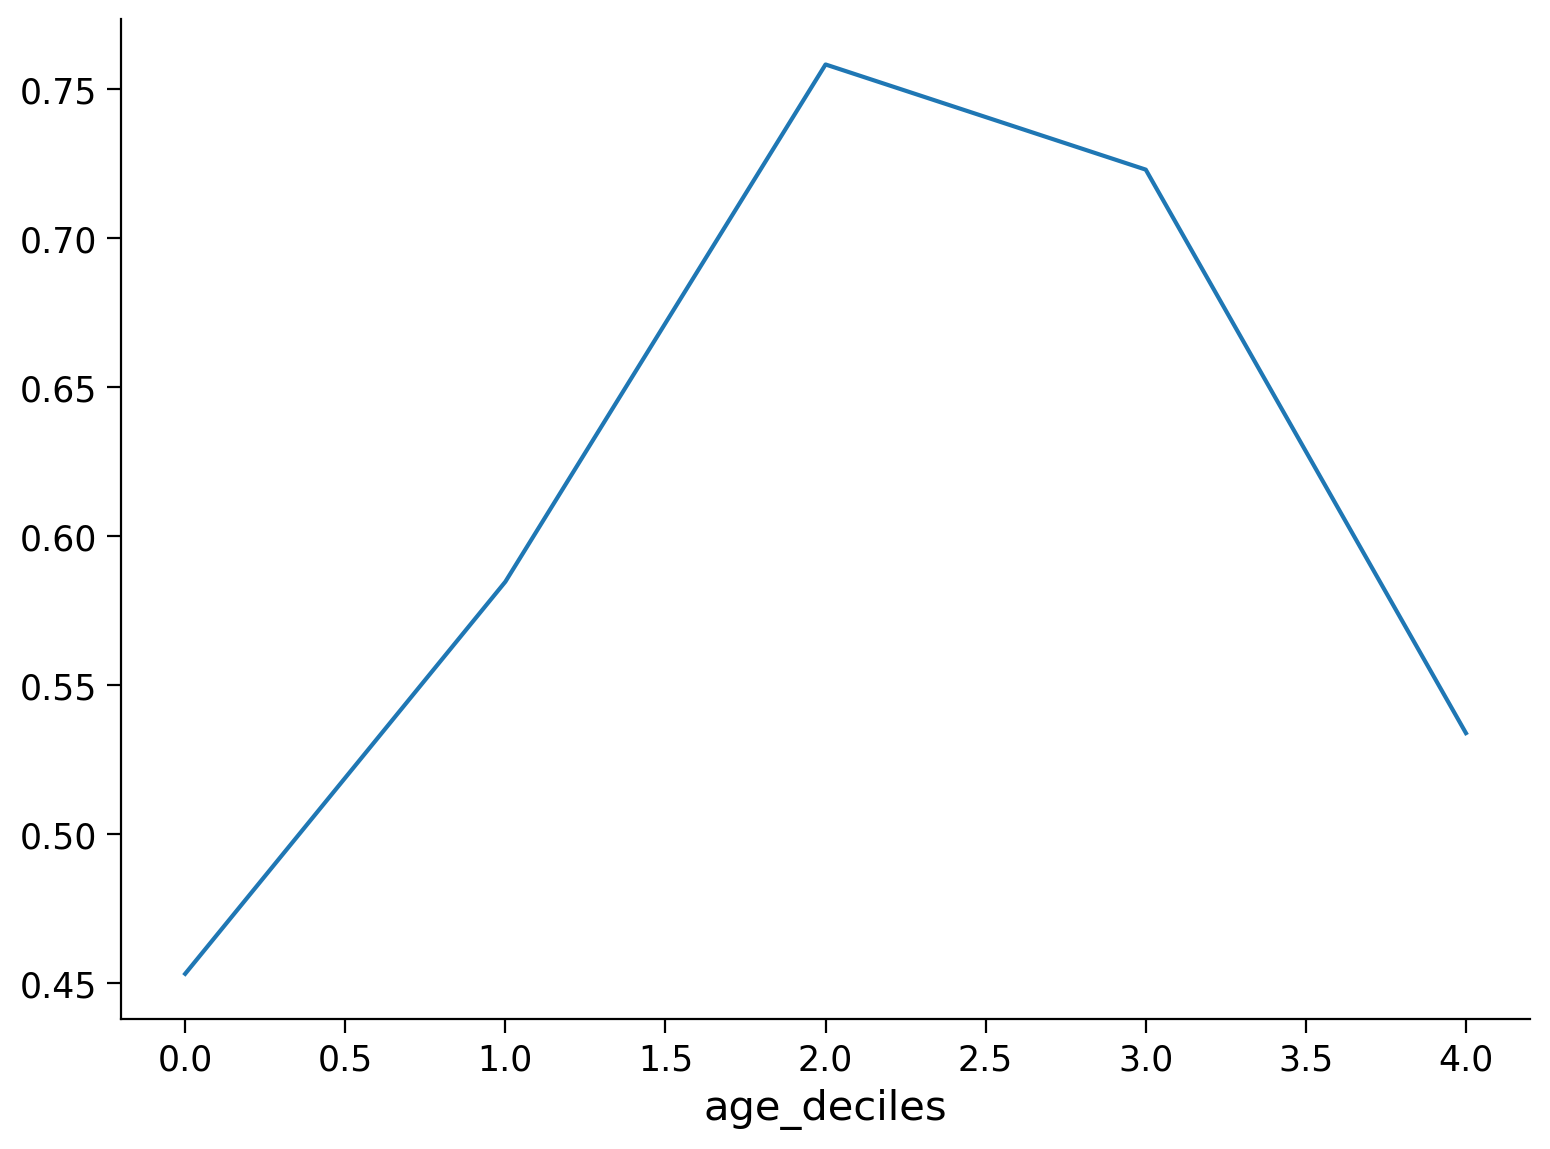

In [31]:
prop_by_age.plot();

Non emerge alcuna tendenza degna di rilievo.

Creaimo un istogramma per la variabile `Test_Proportion_Gaze_to_Singer`.

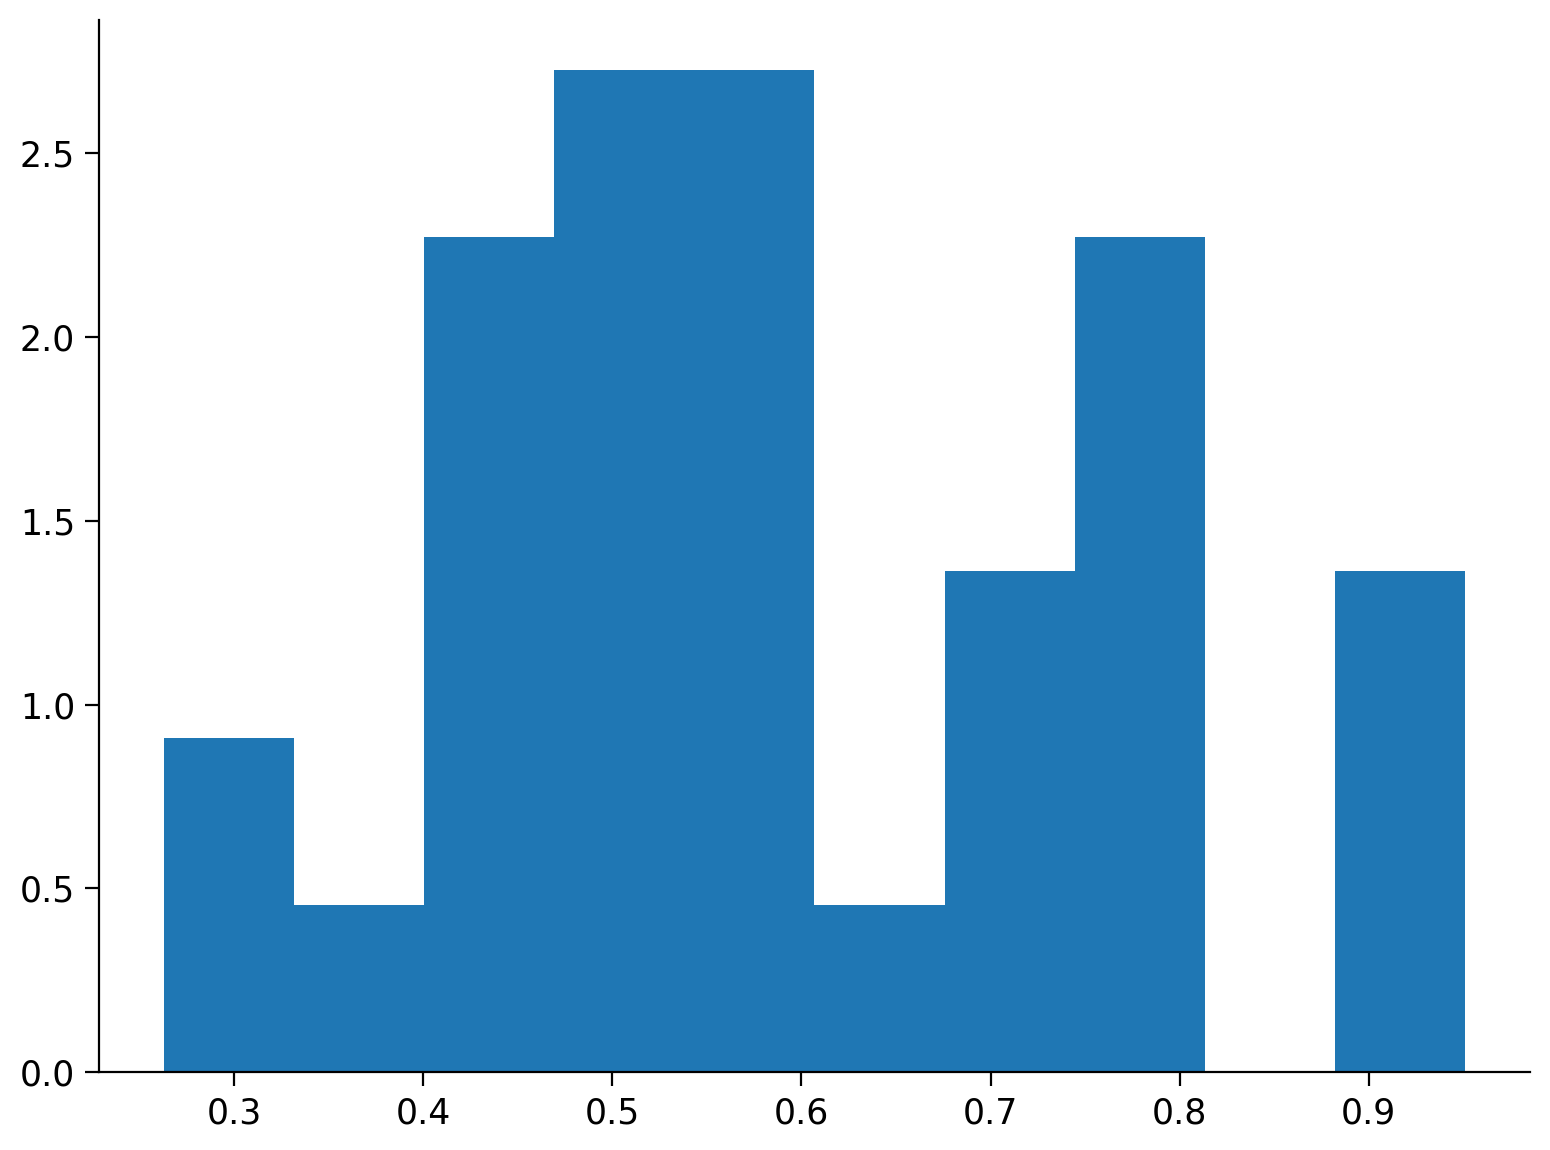

In [32]:
plt.hist(df["Test_Proportion_Gaze_to_Singer"], density=True);

Rappresentiamo gli stessi dati con un KDE plot.

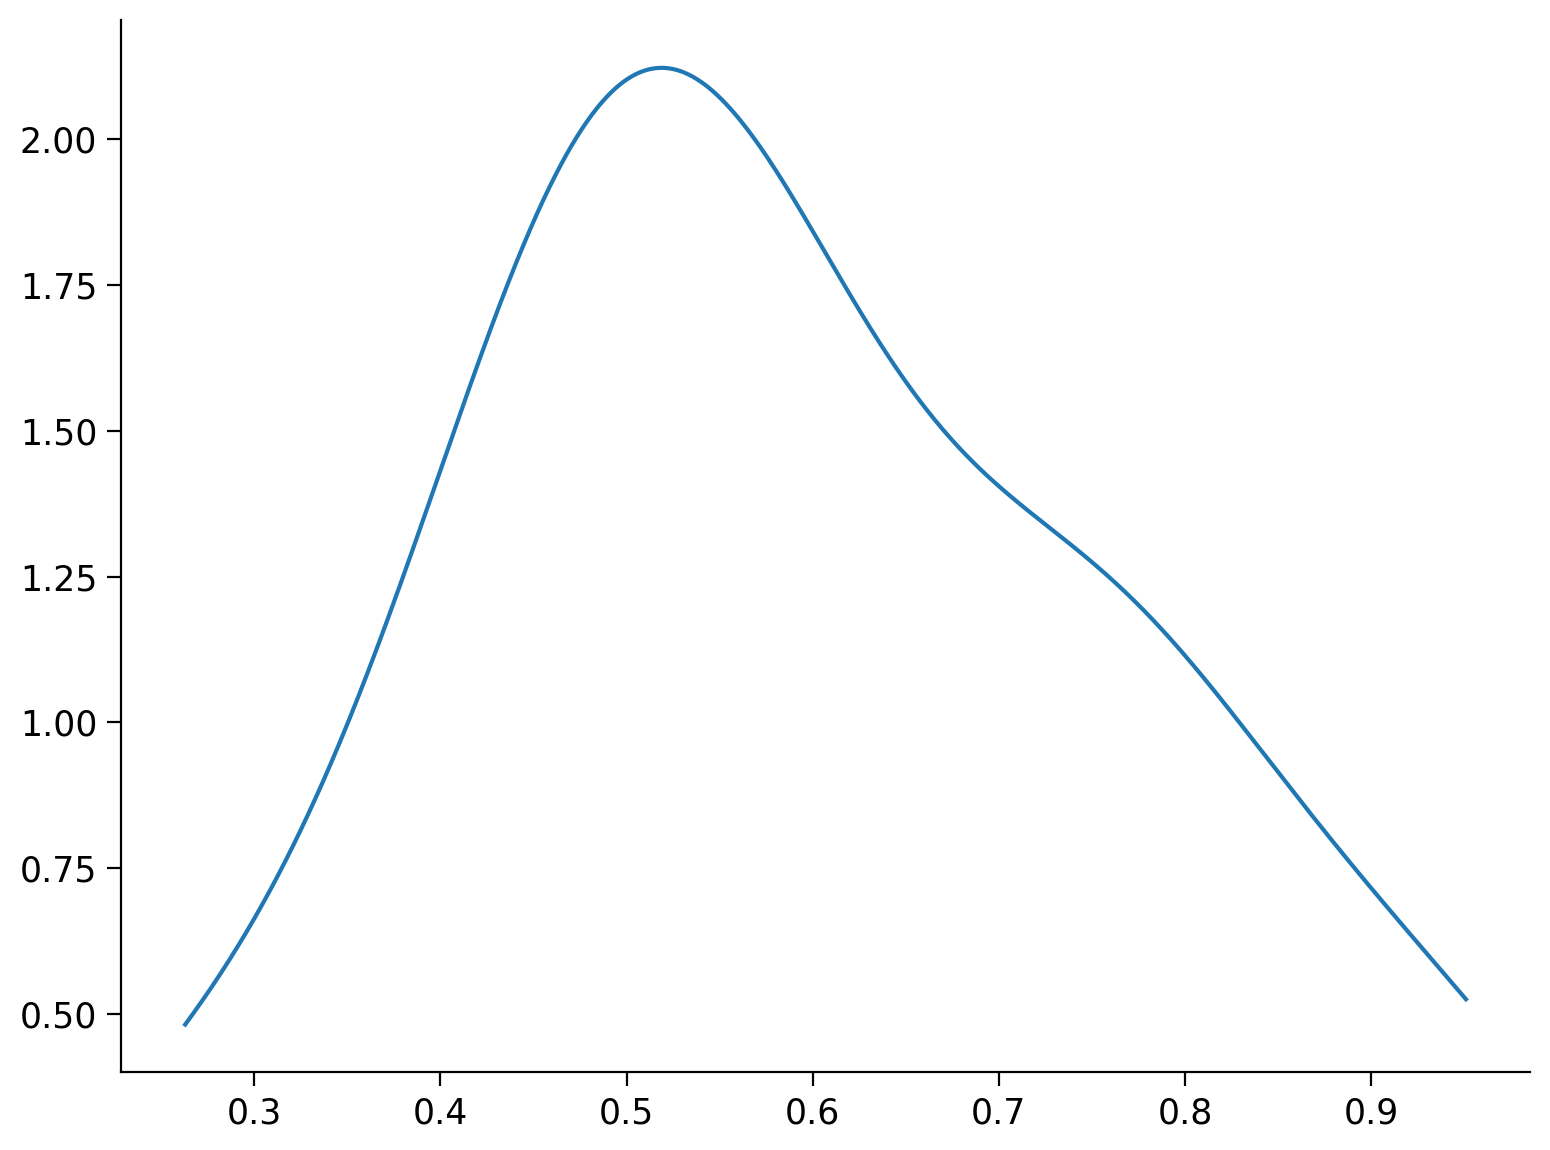

In [33]:
density = stats.gaussian_kde(df["Test_Proportion_Gaze_to_Singer"])
xs = np.linspace(min(df["Test_Proportion_Gaze_to_Singer"]), max(df["Test_Proportion_Gaze_to_Singer"]), 1000)
plt.plot(xs, density(xs));

Usando seaborn è facile creare due KDE plot sovrapposti, uno per i maschi e uno per le femmine.

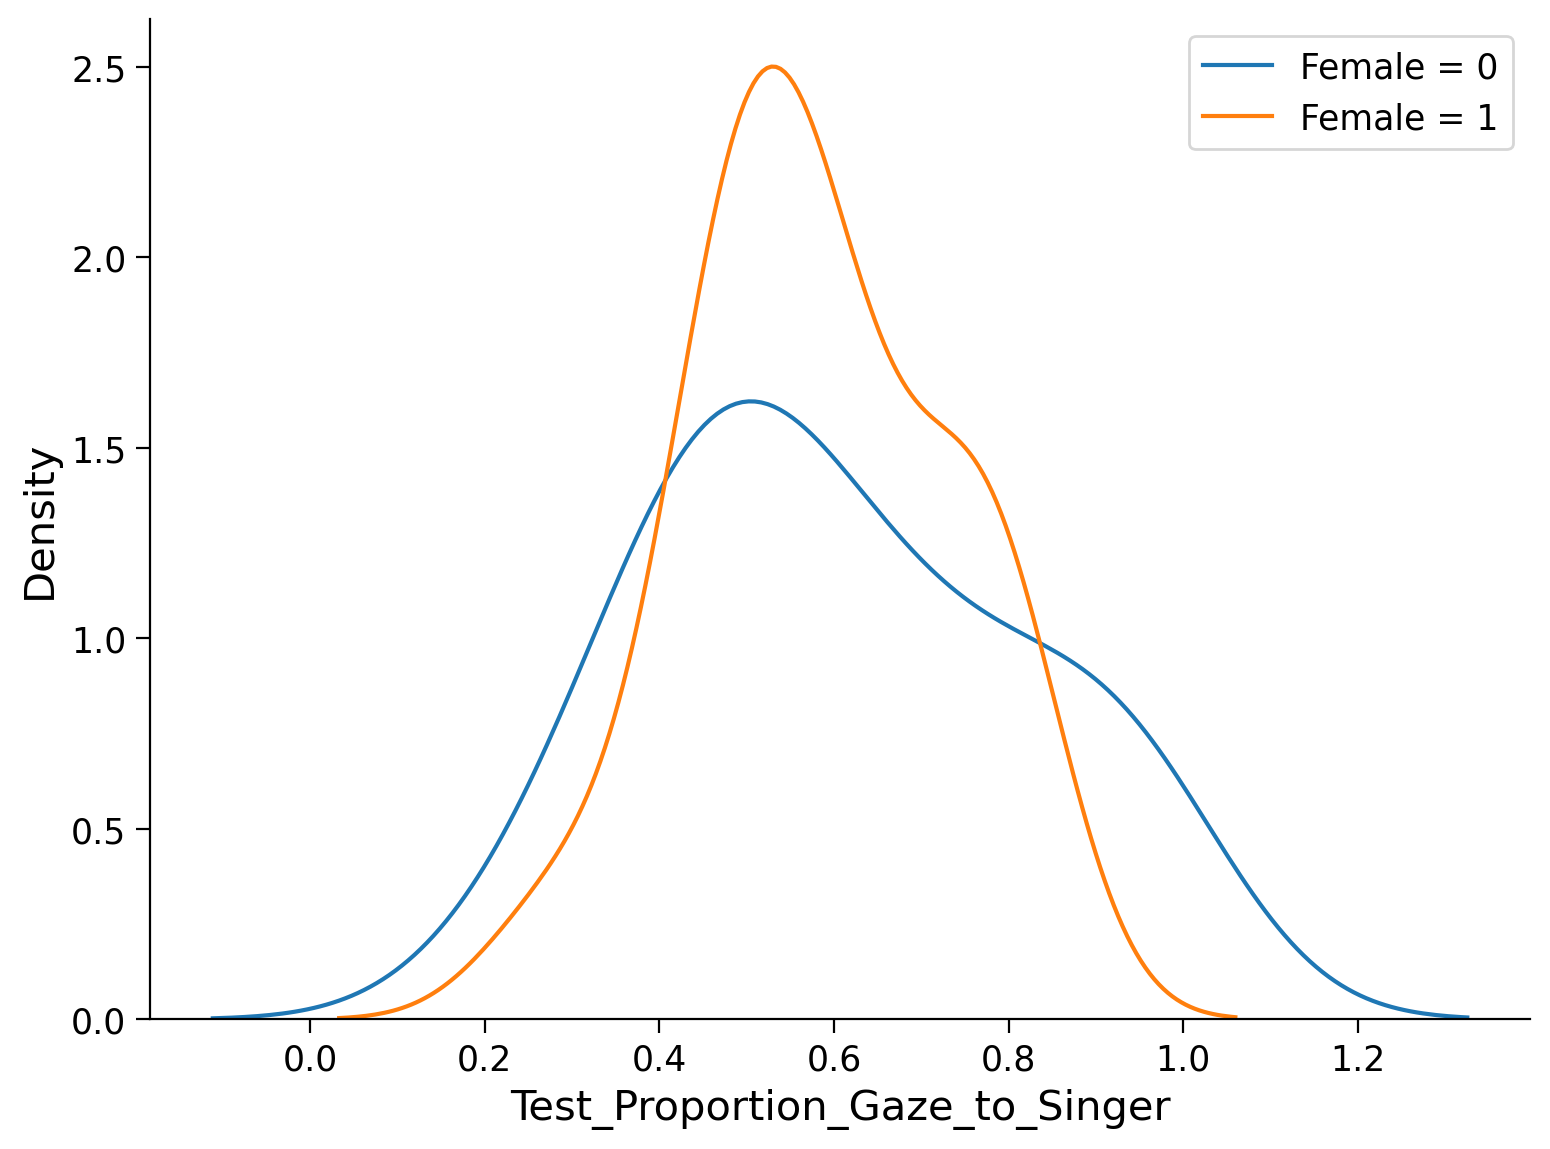

In [34]:
# KDE plot for female = 0 (or the first level)
sns.kdeplot(df[df["female"] == 0]["Test_Proportion_Gaze_to_Singer"], label='Female = 0')
# KDE plot for female = 1 (or the second level)
sns.kdeplot(df[df["female"] == 1]["Test_Proportion_Gaze_to_Singer"], label='Female = 1')
plt.legend();

Creiamo due boxplot, uno per i maschi e uno per le femmine.

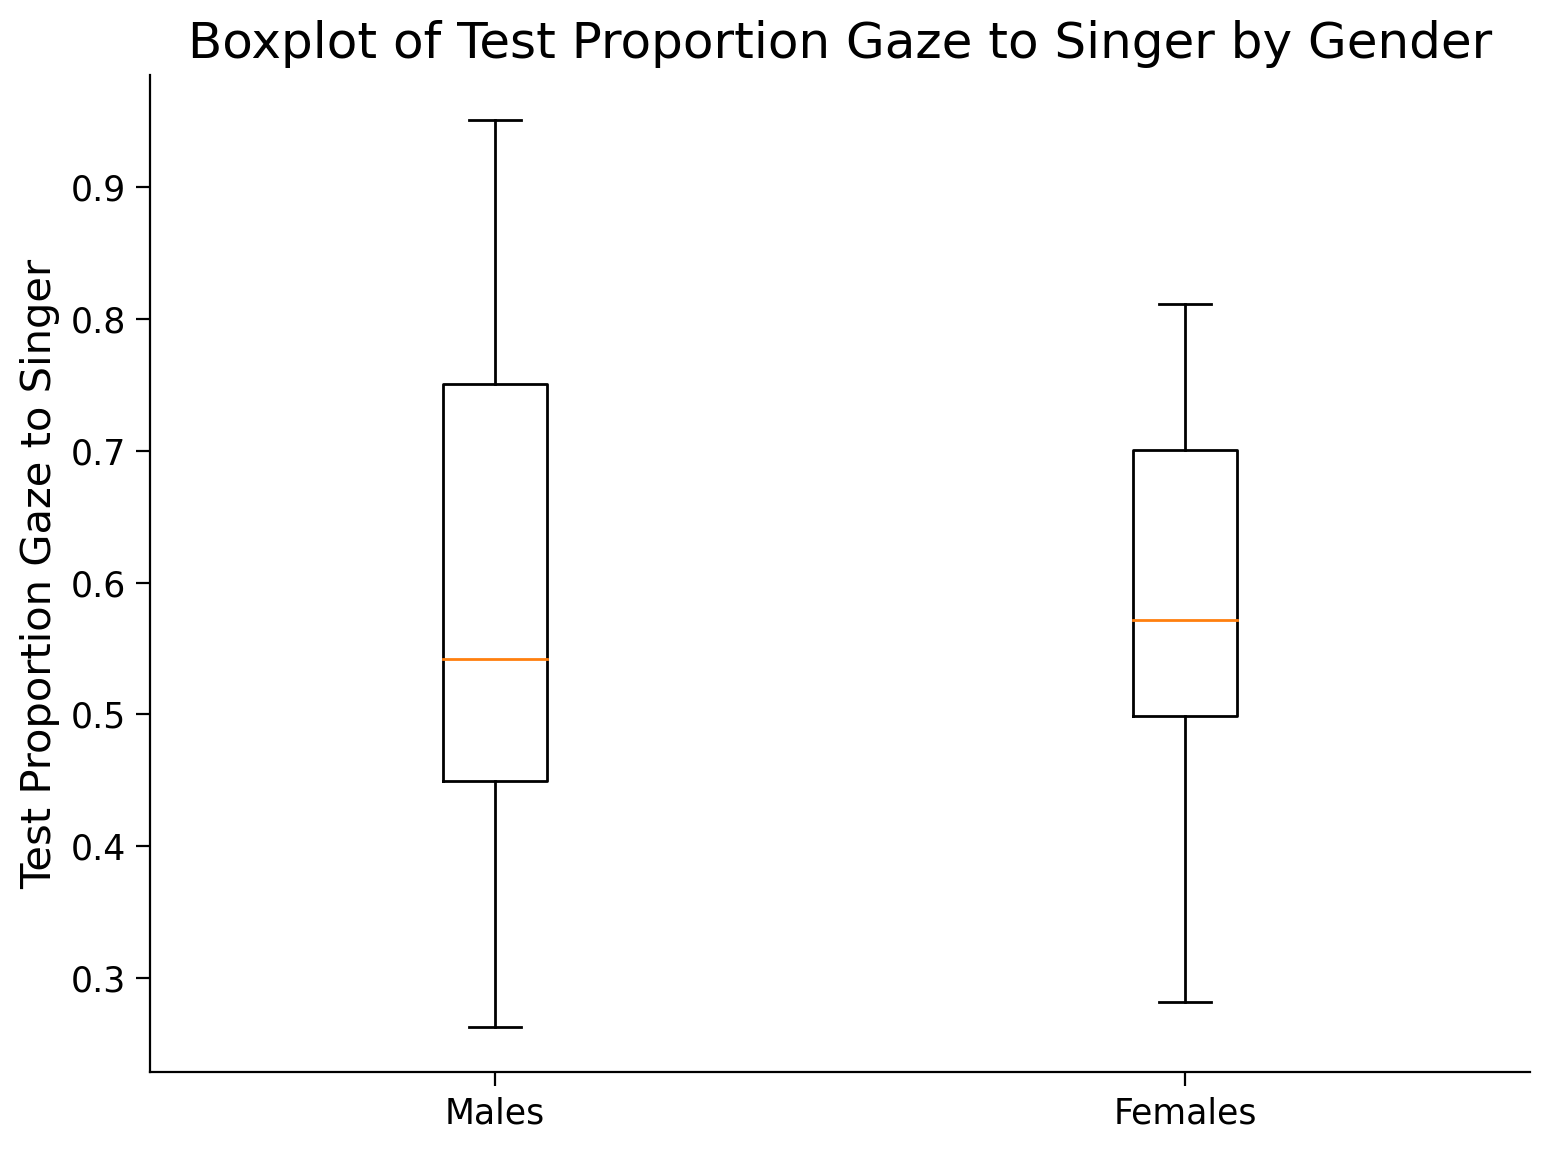

In [35]:
# Filter the data by the levels of the "female" variable
female_0 = df[df["female"] == 0]["Test_Proportion_Gaze_to_Singer"]
female_1 = df[df["female"] == 1]["Test_Proportion_Gaze_to_Singer"]

# Combine the filtered data
data = [female_0, female_1]

# Plot the boxplots
plt.boxplot(data, labels=['Males', 'Females'])

plt.title('Boxplot of Test Proportion Gaze to Singer by Gender')
plt.ylabel('Test Proportion Gaze to Singer');